In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MN

In [2]:
data=pd.read_csv("beam.csv")
x=np.array(data.x)
M1=np.array(data.M1) #kNm
M2=np.array(data.M2) #kNm
V1=np.array(data.V1) #kN
V2=np.array(data.V2) #kN

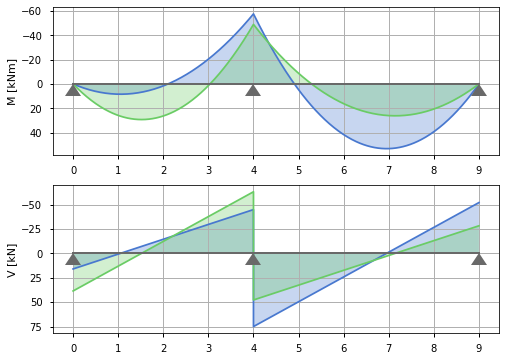

In [3]:
plt.style.use("seaborn-muted")
plt.style.use("seaborn-notebook")
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(8,6))
ax1.invert_yaxis()
ax1.plot(x,M1, label="M1")
ax1.plot(x,M2, label="M2")
ax1.fill_between(x, 0, M1, alpha=0.3)
ax1.fill_between(x, 0, M2, alpha=0.3)
ax1.plot([0,4,9],[0,0,0], linewidth=2, color="dimgrey", 
        marker=6, markersize=16)
ax1.set_ylabel("M [kNm]")
ax1.set_xticks(np.arange(0,10,1))
ax1.grid(True)
ax2.invert_yaxis()
ax2.plot(x,V1, label="M1")
ax2.plot(x,V2, label="M2")
ax2.fill_between(x, 0, V1, alpha=0.3)
ax2.fill_between(x, 0, V2, alpha=0.3)
ax2.plot([0,4,9],[0,0,0], linewidth=2, color="dimgrey", 
        marker=6, markersize=16)
ax2.set_ylabel("V [kN]")
ax2.set_xticks(np.arange(0,10,1))
ax2.grid(True)
fig.savefig("/home/vctr/MEGA/libro/latex/concrete_beam/pictures/plot1.pdf", bbox_inches='tight')

## Envelope

In [4]:
M_neg=np.minimum(M1,M2)
M_pos=np.maximum(M1,M2)

M_neg[M_neg>0]=0
M_pos[M_pos<0]=0

V_neg=np.minimum(V1,V2)
V_pos=np.maximum(V1,V2)

V_neg[V_neg>0]=0
V_pos[V_pos<0]=0

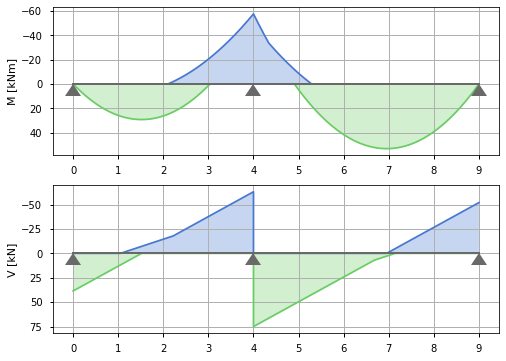

In [5]:
fig, (ax1, ax2)=plt.subplots(nrows=2, ncols=1, figsize=(8,6))
ax1.invert_yaxis()
ax1.plot(x,M_neg, label="M1")
ax1.plot(x,M_pos, label="M2")
ax1.fill_between(x, 0, M_neg, alpha=0.3)
ax1.fill_between(x, 0, M_pos, alpha=0.3)
ax1.plot([0,4,9],[0,0,0], linewidth=2, color="dimgrey", 
        marker=6, markersize=16)
ax1.set_ylabel("M [kNm]")
ax1.set_xticks(np.arange(0,10,1))
ax1.grid(True)
ax2.invert_yaxis()
ax2.plot(x,V_neg, label="M1")
ax2.plot(x,V_pos, label="M2")
ax2.fill_between(x, 0, V_neg, alpha=0.3)
ax2.fill_between(x, 0, V_pos, alpha=0.3)
ax2.plot([0,4,9],[0,0,0], linewidth=2, color="dimgrey", 
        marker=6, markersize=16)
ax2.set_ylabel("V [kN]")
ax2.set_xticks(np.arange(0,10,1))
ax2.grid(True)

In [6]:
def find_maxima(a):
    maxima=[]
    index=[]
    n=len(a)
    for i in range(n):
        if i==0:
            if a[0]>a[1]:
                maxima.append(a[0])
                index.append(i)
        elif i==n-1:
            if a[-1]>a[-2]:
                maxima.append(a[-1])
                index.append(i)
        else:
            if a[i]>=a[i-1] and a[i]>a[i+1]:
                maxima.append(a[i])
                index.append(i)
    return (maxima, index)

In [7]:
M_pos_max, index_pos_M=find_maxima(M_pos)
M_neg_max, index_neg_M=find_maxima(abs(M_neg))
M_pos_max=np.array(M_pos_max)
M_neg_max=-np.array(M_neg_max)

V_pos_max, index_pos_V=find_maxima(V_pos)
V_neg_max, index_neg_V=find_maxima(abs(V_neg))
V_pos_max=np.array(V_pos_max)
V_neg_max=-np.array(V_neg_max)

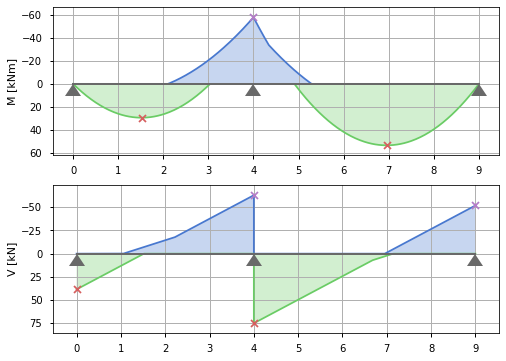

In [8]:
fig, (ax1, ax2)=plt.subplots(nrows=2, ncols=1, figsize=(8,6))
ax1.invert_yaxis()
ax1.plot(x,M_neg, label="M1")
ax1.plot(x,M_pos, label="M2")
ax1.fill_between(x, 0, M_neg, alpha=0.3)
ax1.fill_between(x, 0, M_pos, alpha=0.3)
ax1.plot([0,4,9],[0,0,0], linewidth=2, color="dimgrey", 
        marker=6, markersize=16)
ax1.set_ylabel("M [kNm]")
ax1.set_xticks(np.arange(0,10,1))
ax1.grid(True)
ax2.invert_yaxis()
ax2.plot(x,V_neg, label="M1")
ax2.plot(x,V_pos, label="M2")
ax2.fill_between(x, 0, V_neg, alpha=0.3)
ax2.fill_between(x, 0, V_pos, alpha=0.3)
ax2.plot([0,4,9],[0,0,0], linewidth=2, color="dimgrey", 
        marker=6, markersize=16)
ax2.set_ylabel("V [kN]")
ax2.set_xticks(np.arange(0,10,1))
ax2.grid(True)
ax1.scatter(x[index_pos_M], M_pos_max, zorder=9, marker='x')
ax1.scatter(x[index_neg_M], M_neg_max, zorder=9, marker='x')
ax2.scatter(x[index_pos_V], V_pos_max, zorder=9, marker='x')
ax2.scatter(x[index_neg_V], V_neg_max, zorder=9, marker='x')

In [9]:
a=400 #mm
b=300 #mm
c=50 #mm
d=a-c #mm
z=0.9*d #mm
Abar=201.062 #mm^2

fck=25 #N/mm^2
fyk=450 #N/mm^2
gamma_s=1.15
gamma_c=1.5
fcd=0.85*fck/gamma_c #N/mm^2
fyd=fyk/gamma_s

In [10]:
Nrd_tot, Mrd_tot=MN.getDomain(a, b, c, 2*Abar, 2*Abar, fck, fyk)
Mrd1=np.interp(0, Nrd_tot[::-1], Mrd_tot[::-1])
Nrd_tot, Mrd_tot=MN.getDomain(a, b, c, 3*Abar, 2*Abar, fck, fyk)
Mrd3=np.interp(0, Nrd_tot[::-1], Mrd_tot[::-1])
Mrd2=-Mrd3

In [11]:
if M_pos_max[0]<Mrd1:
    print("sec. 1: VERIFIED")
else:
    print("sec. 1: NOT VERIFIED")    
if M_neg_max[0]>Mrd2:
    print("sec. 2: VERIFIED")
else:
    print("sec. 2: NOT VERIFIED")    
if M_pos_max[1]<Mrd3:
    print("sec. 3: VERIFIED")
else:
    print("sec. 3: NOT VERIFIED")

sec. 1: VERIFIED
sec. 2: VERIFIED
sec. 3: VERIFIED


# Shear

In [12]:
Vmax=max(max(V_pos_max), max(abs(V_neg_max)))
print("Vmax = %d"%(Vmax)+" kN")

Vmax = 75 kN


In [13]:
bw=b 
k=1+(200/d)**0.5
rho_l=max(3*Abar/(bw*d), 0.02)
sig_cp=0 
Ac=b*a
CRd_c=0.18/gamma_c
k1=0.15
nu_min=0.035*k**1.5*fck**0.5

Vrd_c=max((CRd_c*k*(100*rho_l*fck)**(1/3)+k1*sig_cp)*bw*d,
         (nu_min+k1*sig_cp)*bw*d)
print("Vrd_c = %d"%(Vrd_c*0.001)+" kN")

Vrd_c = 81 kN


In [14]:
Asw=100 #mm^2, 2phi8
s=300 #mm, step

cotTheta=2.5 
theta=np.arctan(1/cotTheta)

alpha_cw=1
bw=300
nu1=0.6*(1-fck/250)

In [15]:
Vrd_s=(Asw/s)*z*fyd*cotTheta*0.001 #kN
Vrd_max=alpha_cw*bw*z*nu1*fcd/(cotTheta+np.tan(theta))*0.001 #kN

print("Vrd_s= %d"%(Vrd_s)+"kN")
print("Vrd_c= %d"%(Vrd_max)+"kN")

Vrd_s= 102kN
Vrd_c= 249kN


In [16]:
Asw=100 #mm^2, 2phi8
s=250 #mm, step
rho_w=Asw/(s*bw)
rho_w_min=(0.08*(fck)**0.5)/fyk
print("rho_w= %.6f"%(rho_w))
print("rho_w_min= %.6f"%(rho_w_min))

rho_w= 0.001333
rho_w_min= 0.000889


In [17]:
0.75*d


262.5